<a href="https://colab.research.google.com/github/mae001/Machine-Learning-projects/blob/main/transfer_learning_tensorflow_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py

--2024-07-26 15:56:55--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-07-26 15:56:55 (17.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-07-26 15:57:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   229MB/s    in 0.7s    

2024-07-26 15:57:36 (229 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data('/content/10_food_classes_10_percent.zip')

In [ ]:
walk_through_dir("/content/10_food_classes_10_percent")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_per

In [ ]:
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                                    image_size = IMG_SIZE,
                                                                    label_mode = 'categorical',
                                                                    batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                    image_size = IMG_SIZE,
                                                                    label_mode = 'categorical',
                                                                    batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 750 files belonging to 10 classes.


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False) #top is the last layer and here we dont need it because we add our own last layers(our data) under the name output

base_model.trainable=False

inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = 'input_layer')

x=base_model(inputs)

print(f"shape after passing inputs through base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = 'Global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D {x.shape}')

outputs = tf.keras.layers.Dense(10, activation='softmax', name = 'output_layer')(x)

model_0 = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 0s 0us/step
shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D (None, 1280)


In [ ]:


model_0.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_10_percent = model_0.fit(train_data_10_percent,
                                 batch_size = BATCH_SIZE,
                                 epochs=5,
                                 validation_data = test_data,
                                 steps_per_epoch = len(train_data_10_percent),
                                 validation_steps = 0.25 * len(test_data),
                                 callbacks = [create_tensorboard_callback('transfer_learning', '10_percent_feature_extraction')])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20240726-162411
Epoch 1/5
24/24 [==============================] - 86s 3s/step - loss: 1.9361 - accuracy: 0.3893 - val_loss: 1.3638 - val_accuracy: 0.7292
Epoch 2/5
24/24 [==============================] - 74s 3s/step - loss: 1.1445 - accuracy: 0.7427 - val_loss: 0.8542 - val_accuracy: 0.8229
Epoch 3/5
24/24 [==============================] - 73s 3s/step - loss: 0.8137 - accuracy: 0.8333 - val_loss: 0.7011 - val_accuracy: 0.8490
Epoch 4/5
24/24 [==============================] - 73s 3s/step - loss: 0.6544 - accuracy: 0.8573 - val_loss: 0.5937 - val_accuracy: 0.8750
Epoch 5/5
24/24 [==============================] - 76s 3s/step - loss: 0.5515 - accuracy: 0.8880 - val_loss: 0.5382 - val_accuracy: 0.8698


In [ ]:
model_0.evaluate(test_data)

24/24 [==============================] - 54s 2s/step - loss: 0.4779 - accuracy: 0.9067


[0.4779270887374878, 0.9066666960716248]

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 Global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
__________________

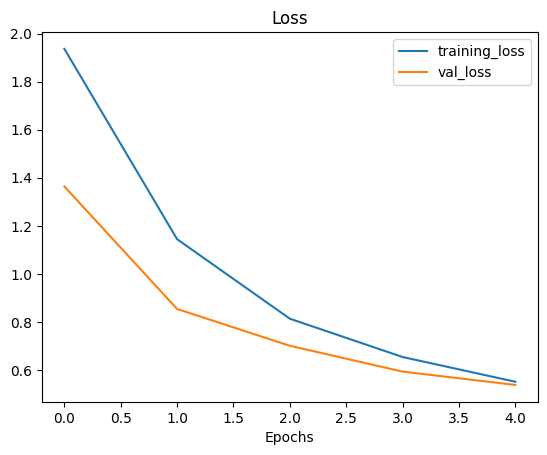

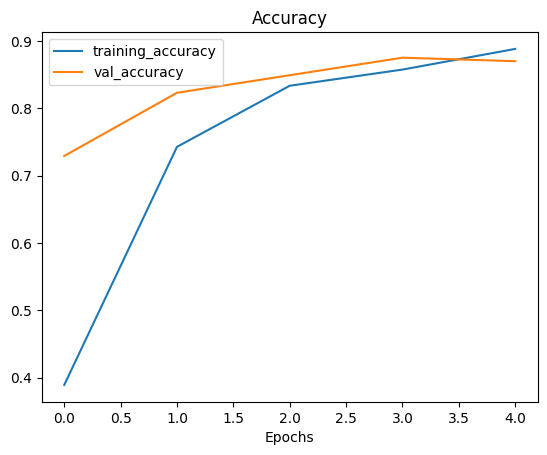

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2024-07-26 17:04:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   240MB/s    in 0.5s    

2024-07-26 17:04:58 (240 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data ('/content/10_food_classes_1_percent.zip')

In [ ]:
walk_through_dir ('/content/10_food_classes_1_percent')

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/h

In [ ]:
train_dir = '/content/10_food_classes_1_percent/train'
test_dir = '/content/10_food_classes_1_percent/test'

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_1_percent = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                                    image_size = IMG_SIZE,
                                                                    label_mode = 'categorical',
                                                                    batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                    image_size = IMG_SIZE,
                                                                    label_mode = 'categorical',
                                                                    batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 70 files belonging to 10 classes.


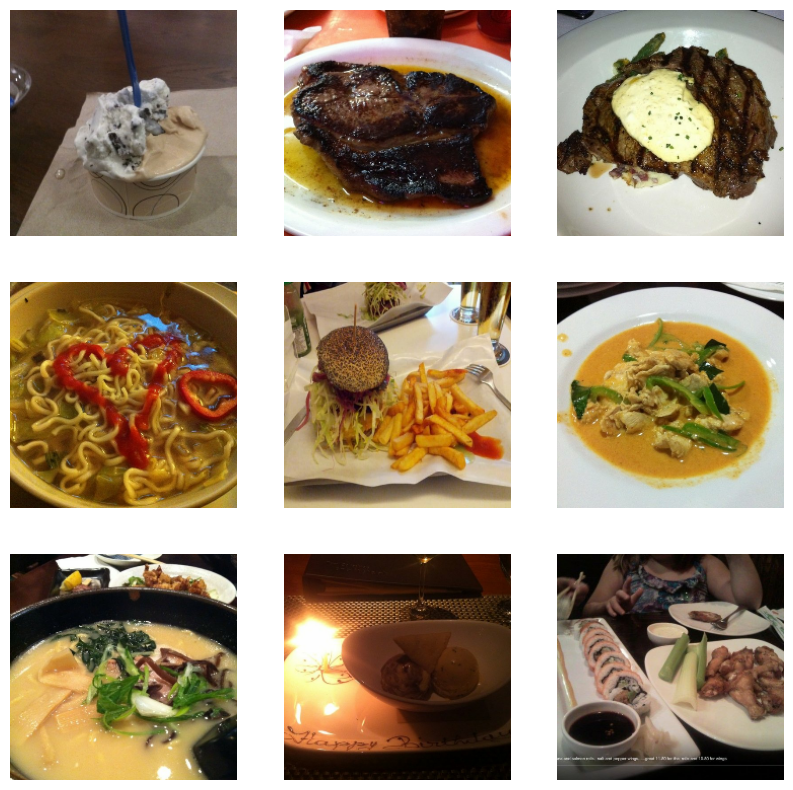

In [ ]:
import matplotlib.pyplot as plt

class_names = train_data_1_percent.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_data_1_percent.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    # plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_data_1_percent = train_data_1_percent.prefetch(buffer_size=AUTOTUNE)
test_data = test_data.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

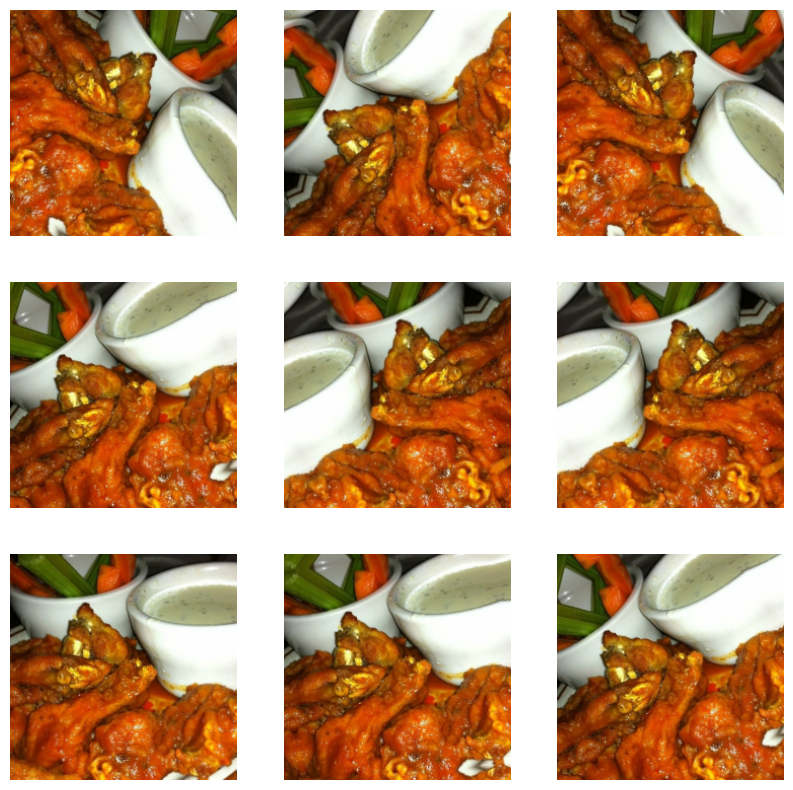

In [ ]:
for image, _ in train_data_1_percent.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False) #top is the last layer and here we dont need it because we add our own last layers(our data) under the name output


inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = 'input_layer')

x=base_model(inputs)

print(f"shape after passing inputs through base model: {x.shape}")

# x = tf.keras.layers.GlobalAveragePooling2D(name = 'Global_average_pooling_layer')(x)
# print(f'Shape after GlobalAveragePooling2D {x.shape}')

# outputs = tf.keras.layers.Dense(10, activation='softmax', name = 'output_layer')(x)

# model_0 = tf.keras.Model(inputs, outputs)



shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D (None, 1280)


In [ ]:
image_batch, label_batch = next(iter(train_data_1_percent))
feature_batch = base_model(image_batch)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:

base_model.trainable=False

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, None, None, 3)        7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, None, None, 3)        0         ['normalization_1

In [ ]:
prediction_layer = tf.keras.layers.Dense(1, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

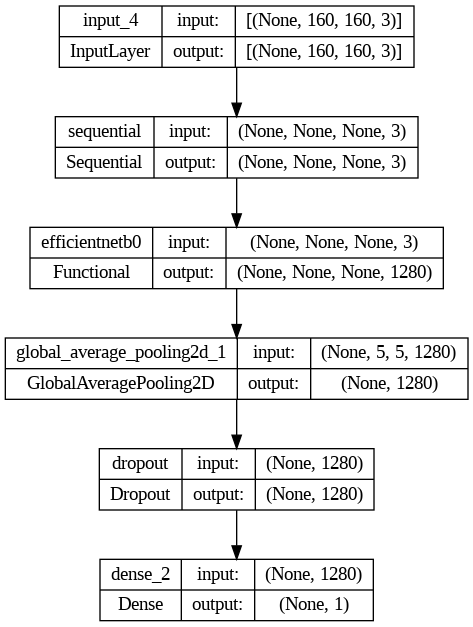

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics=['accuracy'])

In [ ]:
from skimage.transform import rescale, resize, downscale_local_mean


In [ ]:
image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(
    image, (image.shape[0] // 4, image.shape[1] // 4), anti_aliasing=True
)

ValueError: output_shape length cannot be smaller than the image number of dimensions

In [ ]:
train_data_1_percent = train_data_1_percent.map(lambda x, y: (resize_and_rescale(x, image_size = (160, 160)), y))

NameError: in user code:

    File "<ipython-input-55-04f7b8900168>", line 1, in None  *
        lambda x, y: (resize_and_rescale(x, image_size = (160, 160)), y)

    NameError: name 'resize_and_rescale' is not defined


In [ ]:
history_1_percent = model.fit(train_data_1_percent,
                                 batch_size = BATCH_SIZE,
                                 epochs=5,
                                 validation_data = test_data,
                                 steps_per_epoch = len(train_data_10_percent),
                                 validation_steps = 0.25 * len(test_data),
                                #  callbacks = [create_tensorboard_callback('transfer_learning', '1_percent_feature_extraction')]
)

Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 160, 160, 3), found shape=(None, 224, 224, 3)
